# Phonon magnitude analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon displacement vectors at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of the magnitude of these vectors for each k-point.

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [2]:
# Change as necessary
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

In [3]:
th_min, th_max, ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
ntheta = int(ntheta)
KPT = 'Gamma'
print(f"{ntheta} angles from {th_min} to {th_max}")

101 angles from 0.01 to 10.0


In [13]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
phonons = np.load(ppath)
nmodes = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

Dataset shape: (101, 35, 1521, 3)
Number of modes: 35


In [57]:
mean_umag = np.mean(LA.norm(dataset, axis=-1), axis=2)
max_umag = np.max(LA.norm(dataset, axis=-1), axis=2)
max_uz = np.max(dataset[:,:,:,-1], axis=2)
mean_uz = np.mean(dataset[:,:,:,-1], axis=2)

In [64]:
# Import the indices and extract the modes
LB1_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_idxs.npy')
S_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_S_idxs.npy')

LB1_max = np.zeros(ntheta)
LB1_mean = np.zeros(ntheta)
LB1_max_z = np.zeros(ntheta)
LB1_mean_z = np.zeros(ntheta)
S_max = np.zeros(ntheta)
S_mean = np.zeros(ntheta)

for i in range(ntheta):
    LB1_max[i] = max_umag[i, LB1_idxs[i]]
    LB1_mean[i] = mean_umag[i, LB1_idxs[i]]
    LB1_max_z[i] = max_uz[i, LB1_idxs[i]]
    LB1_mean_z[i] = mean_uz[i, LB1_idxs[i]]
    
    S_max[i] = max_umag[i, S_idxs[i]]
    S_mean[i] = mean_umag[i, S_idxs[i]]
    
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_max.npy', LB1_max)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_mean.npy', LB1_mean)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_max_z.npy', LB1_max_z)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_mean_z.npy', LB1_mean_z)

<Figure size 432x288 with 0 Axes>

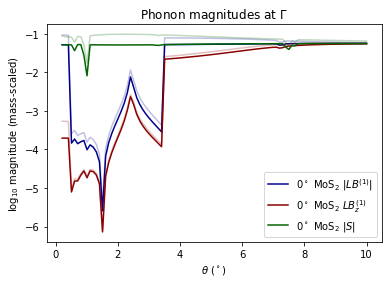

In [67]:
assert 0 <= WHICH_MODE < nmodes, "Invalid mode!"
plt.clf()
_, ax = plt.subplots()
ax.set_title(fr"Phonon magnitudes at {log_name}")
ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel(r'$\log_{10}$ magnitude (mass-scaled)')

# fit = np.poly1d(np.polyfit(thetas[2:], np.log10(LB1_mean)[2:], 11))
# x = np.linspace(0.1, 10, 101)
# ax.plot(x, fit(x))
ax.plot(thetas[2:], np.log10(LB1_mean)[2:], color='darkblue', label=r'$0^\circ$ MoS$_2$ $|LB^{(1)}|$')
ax.plot(thetas[2:], np.log10(LB1_max)[2:], color='darkblue', alpha=0.25)
ax.plot(thetas[2:], np.log10(LB1_mean_z)[2:], color='darkred', label=r'$0^\circ$ MoS$_2$ $LB^{(1)}_z$')
ax.plot(thetas[2:], np.log10(LB1_max_z)[2:], color='darkred', alpha=0.25)
ax.plot(thetas[2:], np.log10(S_mean)[2:], color='darkgreen', label=r'$0^\circ$ MoS$_2$ $|S|$')
ax.plot(thetas[2:], np.log10(S_max)[2:], color='darkgreen', alpha=0.25)
ax.legend()
plt.savefig("/Users/jonathanlu/Documents/tvMoS2/theta/data/mags.pdf")
plt.show()
